In [ ]:
pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [ ]:
# 1. Define fuzzy variables (inputs and outputs)
# Input: Structural Damage, Neglect Level, Material Degradation, Hazard Level, Age, Access
damage = ctrl.Antecedent(np.arange(0, 11, 1), 'Damage') # Structural Damage
neglect = ctrl.Antecedent(np.arange(0, 11, 1), 'Neglect') # Neglect Level
degradation = ctrl.Antecedent(np.arange(0, 11, 1), 'Degradation') # Material Degradation
hazard = ctrl.Antecedent(np.arange(0, 11, 1), 'Hazard') # Hazard Level
age = ctrl.Antecedent(np.arange(0, 101, 1), 'Age') # Age of Building
access = ctrl.Antecedent(np.arange(0, 11, 1), 'Access') # Access to building

# Output: Urgency of Action (damage priority level)
urgency = ctrl.Consequent(np.arange(0, 11, 1), 'Urgency')

In [ ]:
# 2. Define fuzzy membership functions for each input and output
# Structural Damage (0 to 10 scale, low to high damage)
damage['low'] = fuzz.trimf(damage.universe, [0, 0, 5])
damage['medium'] = fuzz.trimf(damage.universe, [0, 5, 10])
damage['high'] = fuzz.trimf(damage.universe, [5, 10, 10])

# Neglect Level (0 to 10 scale, low to high neglect)
neglect['low'] = fuzz.trimf(neglect.universe, [0, 0, 5])
neglect['medium'] = fuzz.trimf(neglect.universe, [0, 5, 10])
neglect['high'] = fuzz.trimf(neglect.universe, [5, 10, 10])

# Material Degradation (0 to 10 scale, low to high degradation)
degradation['low'] = fuzz.trimf(degradation.universe, [0, 0, 5])
degradation['medium'] = fuzz.trimf(degradation.universe, [0, 5, 10])
degradation['high'] = fuzz.trimf(degradation.universe, [5, 10, 10])

# Hazard Level (0 to 10 scale, low to high hazard level)
hazard['low'] = fuzz.trimf(hazard.universe, [0, 0, 5])
hazard['medium'] = fuzz.trimf(hazard.universe, [0, 5, 10])
hazard['high'] = fuzz.trimf(hazard.universe, [5, 10, 10])

# Age of Building (0 to 100 scale, new to very old)
age['new'] = fuzz.trimf(age.universe, [0, 0, 50])
age['medium'] = fuzz.trimf(age.universe, [0, 50, 100])
age['old'] = fuzz.trimf(age.universe, [50, 100, 100])

# Access to Building (0 to 10 scale, easy to difficult access)
access['easy'] = fuzz.trimf(access.universe, [0, 0, 5])
access['medium'] = fuzz.trimf(access.universe, [0, 5, 10])
access['difficult'] = fuzz.trimf(access.universe, [5, 10, 10])

# Urgency of Action (0 to 10 scale, least urgent to most urgent)
urgency['low'] = fuzz.trimf(urgency.universe, [0, 0, 5])
urgency['medium'] = fuzz.trimf(urgency.universe, [0, 5, 10])
urgency['high'] = fuzz.trimf(urgency.universe, [5, 10, 10])

In [ ]:
# 3. Define fuzzy rules based on the conditions
rule1 = ctrl.Rule(damage['high'] & neglect['high'] & degradation['high'] & hazard['high'], urgency['high'])
rule2 = ctrl.Rule(damage['high'] & neglect['high'] & degradation['medium'] & hazard['medium'], urgency['high'])
rule3 = ctrl.Rule(damage['medium'] & neglect['medium'] & degradation['medium'] & hazard['medium'], urgency['medium'])
rule4 = ctrl.Rule(damage['low'] & neglect['low'] & degradation['low'] & hazard['low'], urgency['low'])
rule5 = ctrl.Rule(hazard['high'] & access['difficult'], urgency['high'])  # Hazard + difficult access = high urgency
rule6 = ctrl.Rule(age['old'] & damage['high'], urgency['high'])  # Older building with high damage = high urgency
rule7 = ctrl.Rule(neglect['high'] & damage['medium'], urgency['medium'])  # High neglect, medium damage = medium urgency

In [ ]:
# 4. Create the control system
urgency_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
urgency_sim = ctrl.ControlSystemSimulation(urgency_ctrl)

In [ ]:
# 5. Provide input values and compute the output
# Example Inputs for a highly damaged building
urgency_sim.input['Damage'] = 9  # High damage
urgency_sim.input['Neglect'] = 8  # High neglect
urgency_sim.input['Degradation'] = 7  # Medium degradation
urgency_sim.input['Hazard'] = 9  # High hazard level
urgency_sim.input['Age'] = 70  # Old building
urgency_sim.input['Access'] = 4  # Difficult access

In [ ]:
# 6. Compute the fuzzy output (urgency of action)
urgency_sim.compute()

# 7. Output result
print(f"Suggested urgency of action level: {urgency_sim.output['Urgency']}")

Suggested urgency of action level: 6.051282051282053


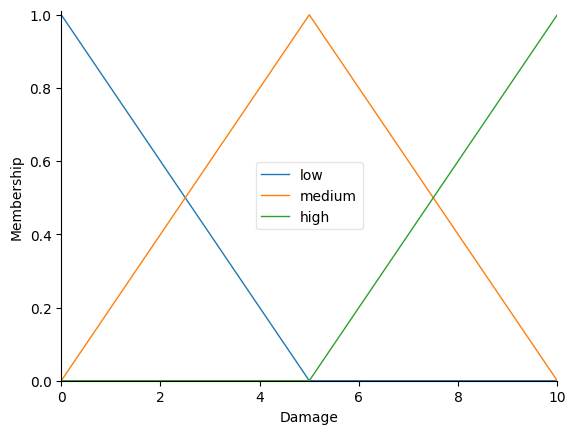

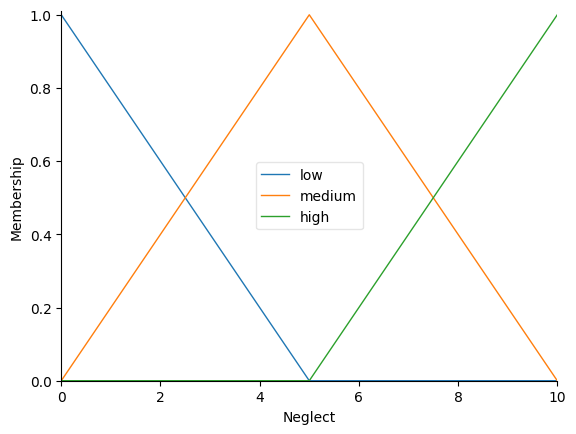

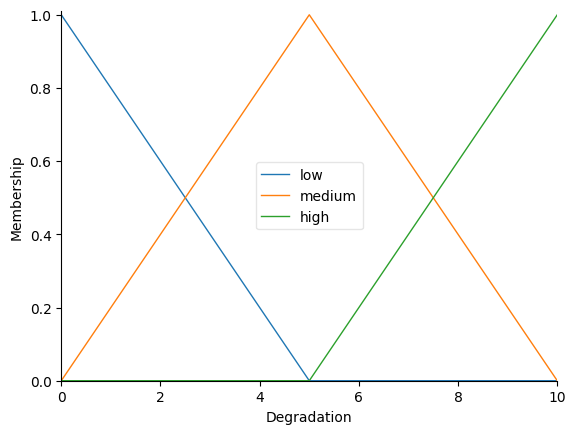

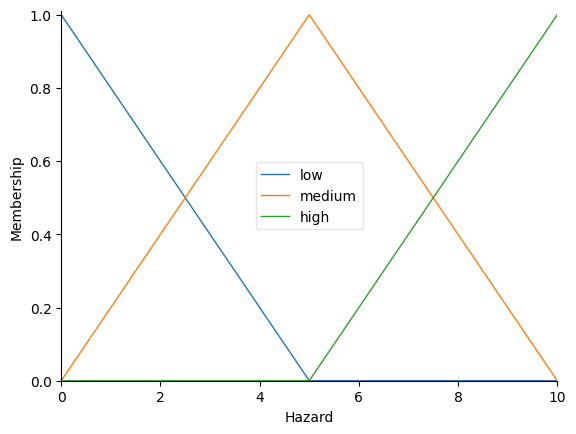

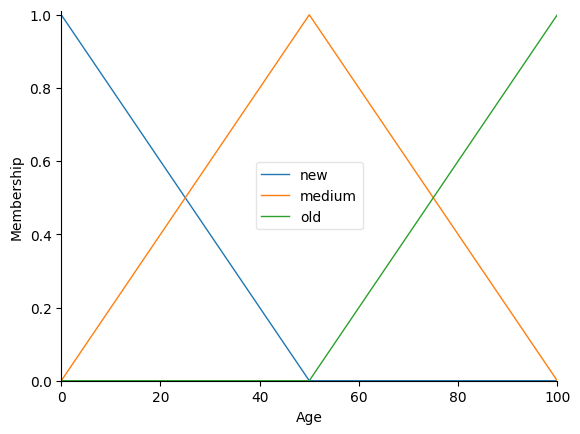

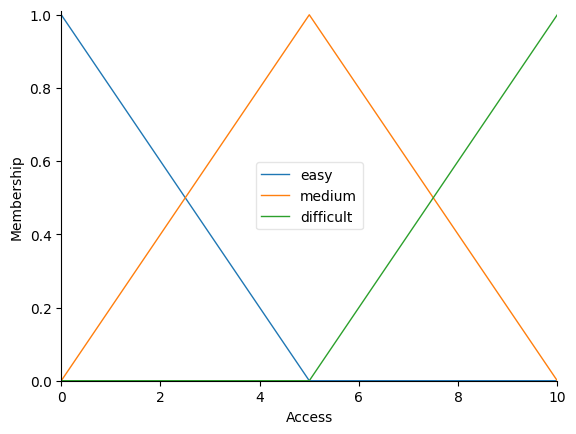

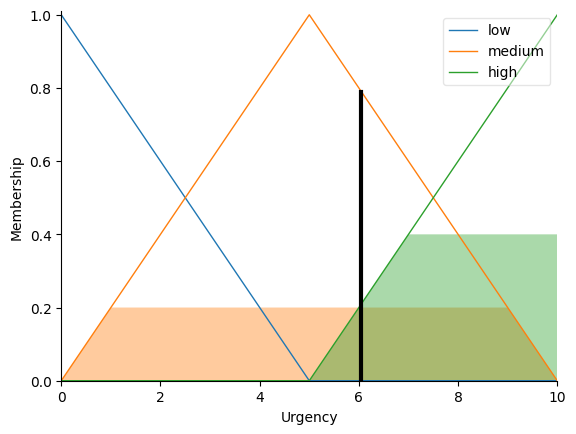

In [ ]:
# 8. Visualize the results
damage.view()
neglect.view()
degradation.view()
hazard.view()
age.view()
access.view()
urgency.view(sim=urgency_sim)

plt.show()

In [ ]:
# Function for Forward Chaining Simulation (testing 3 cases)
def forward_chaining_test():
    # Test Case 1: Critical damage and hazard
    urgency_sim.input['Damage'] = 9
    urgency_sim.input['Hazard'] = 9
    urgency_sim.input['Neglect'] = 8
    urgency_sim.input['Degradation'] = 7
    urgency_sim.input['Age'] = 70
    urgency_sim.input['Access'] = 4
    urgency_sim.compute()
    print("----------forward_chaining----------")
    print("Test Case 1 - Urgency:", urgency_sim.output['Urgency'])

    # Test Case 2: Moderate damage and hazard
    urgency_sim.input['Damage'] = 5
    urgency_sim.input['Hazard'] = 5
    urgency_sim.input['Neglect'] = 4
    urgency_sim.input['Degradation'] = 5
    urgency_sim.input['Age'] = 30
    urgency_sim.input['Access'] = 6
    urgency_sim.compute()
    print("----------forward_chaining----------")
    print("Test Case 2 - Urgency:", urgency_sim.output['Urgency'])

    # Test Case 3: Minimal damage and hazard
    urgency_sim.input['Damage'] = 2
    urgency_sim.input['Hazard'] = 3
    urgency_sim.input['Neglect'] = 3
    urgency_sim.input['Degradation'] = 2
    urgency_sim.input['Age'] = 15
    urgency_sim.input['Access'] = 8
    urgency_sim.compute()
    print("----------forward_chaining----------")
    print("Test Case 3 - Urgency:", urgency_sim.output['Urgency'])

# Function for Backward Chaining Simulation (testing for high urgency)
def backward_chaining_test(urgency_level):
    print("-------------------backward_chaining-------------------------")
    print(f"Testing for Urgency: {urgency_level}")

    if urgency_level == 9:
        print("To achieve high urgency, some conditions might be:")
        print("High damage, high hazard, high neglect, high degradation, old age, and difficult access.")
    elif urgency_level == 5:
        print("To achieve medium urgency, some conditions might be:")
        print("Moderate damage and hazard, medium neglect and degradation, medium access, new building.")
    else:
        print("To achieve low urgency, conditions might include:")
        print("Low damage, low hazard, low neglect, low degradation, easy access.")

# Run forward chaining tests
forward_chaining_test()

# Run backward chaining tests
backward_chaining_test(9)  # High urgency
backward_chaining_test(5)  # Medium urgency


----------forward_chaining----------
Test Case 1 - Urgency: 6.051282051282053
----------forward_chaining----------
Test Case 2 - Urgency: 5.0
----------forward_chaining----------
Test Case 3 - Urgency: 4.518518518518518
-------------------backward_chaining-------------------------
Testing for Urgency: 9
To achieve high urgency, some conditions might be:
High damage, high hazard, high neglect, high degradation, old age, and difficult access.
-------------------backward_chaining-------------------------
Testing for Urgency: 5
To achieve medium urgency, some conditions might be:
Moderate damage and hazard, medium neglect and degradation, medium access, new building.
